In [45]:
from collections import defaultdict
from pymongo import MongoClient
import matplotlib

%matplotlib inline


client = MongoClient()
db = client["senators"]
coll = db["raw_xml"]

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.feature_extraction import DictVectorizer
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np
import random

def graph_senators(names, senators, model="agglomerative"):
    dict_vectorizer = DictVectorizer()
    features = dict_vectorizer.fit_transform(senators)

    if model == "agglomerative":
        labels = AgglomerativeClustering().fit_predict(features.toarray())
    elif model == "kmeans":
        labels = KMeans(2).fit_predict(features)
        
    matplotlib.rcParams['figure.figsize'] = (15.0,12.0)

    mds = MDS()
    coords = mds.fit_transform(features.toarray())
    plot = plt.scatter(coords[:,0], coords[:,1], c=labels, s=100)
    plt.axis("off")

    for i, (name, xy) in enumerate(zip(names, coords)):
        color = "blue" if labels[i] else "red"
        plt.annotate(name, xy = xy, xytext = (1, 1),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.3', fc=color,alpha = .4)
        )

In [47]:
votes = defaultdict(dict)

for cong in range(111,115):
    for roll_call in coll.find({"congress": cong},{"raw":0}):
        for member in roll_call["votes"]:
            votes[member["name"]][(cong, roll_call["session"],roll_call["vote_num"])] = member["vote_score"]

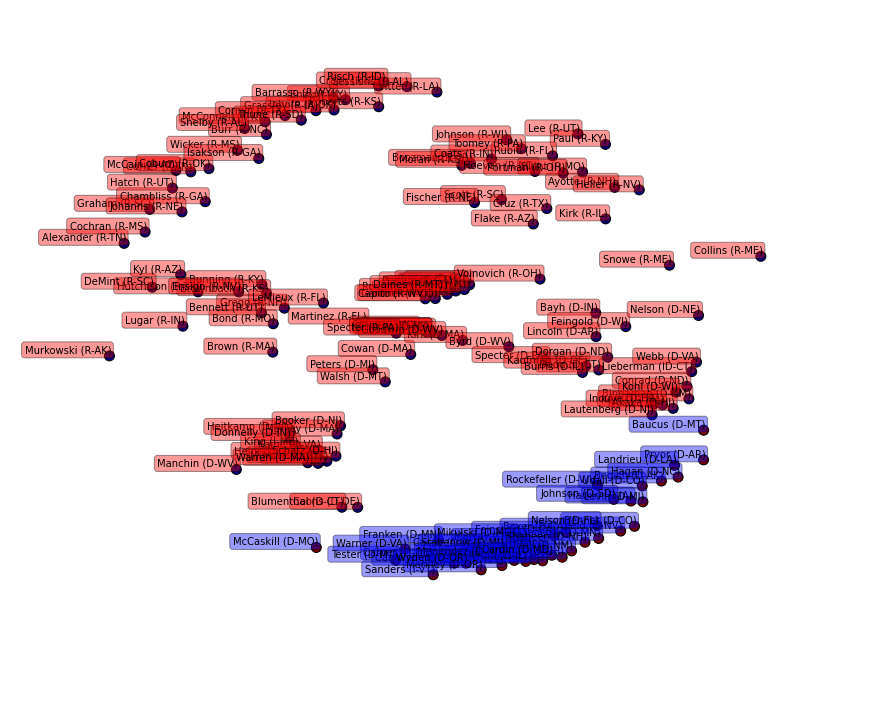

In [48]:
#Obama
senator_names = votes.keys()
senators = [votes[name] for name in senator_names]

graph_senators(senator_names, senators)

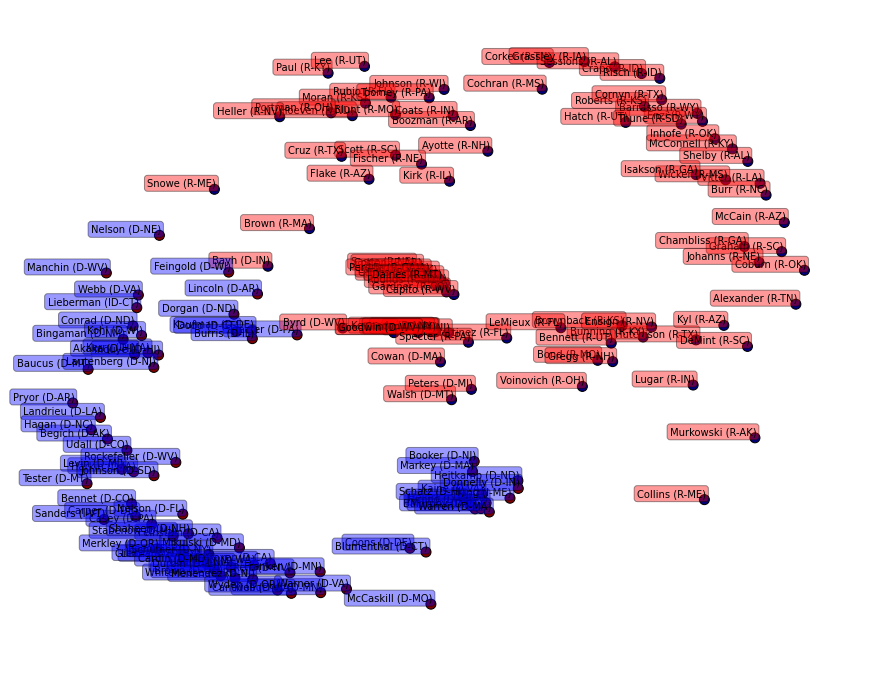

In [ ]:
graph_senators(senator_names, senators, "kmeans")

In [ ]:
bush_votes = defaultdict(dict)

for cong in range(107,111):
    for roll_call in coll.find({"congress": cong},{"raw":0}):
        for member in roll_call["votes"]:
            bush_votes[member["name"]][(cong, roll_call["session"],roll_call["vote_num"])] = member["vote_score"]

In [ ]:
#Bush
senator_names = bush_votes.keys()
senators = [bush_votes[name] for name in senator_names]

graph_senators(senator_names, senators)

In [ ]:
graph_senators(senator_names, senators,"kmeans")